In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


loan_data = pd.read_csv('C:/Users/Ola/Desktop/loan/LoanApprovalPrediction.csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
501,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Rural,Y
502,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
503,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


In [2]:
loan_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.772277,5411.427723,1562.978059,144.566337,341.869307,0.859406
std,1.016542,6127.874416,2564.980770,81.306177,64.900341,0.347947
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3833.000000,1126.000000,128.000000,360.000000,1.000000
75%,2.000000,5818.000000,2253.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


Data Preprocessing and Visualization
1. Get the number of columns of object datatype.

In [3]:
obj = (loan_data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


2. As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [4]:
# Dropping Loan_ID column
loan_data.drop(['Loan_ID'],axis=1,inplace=True)

3. Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

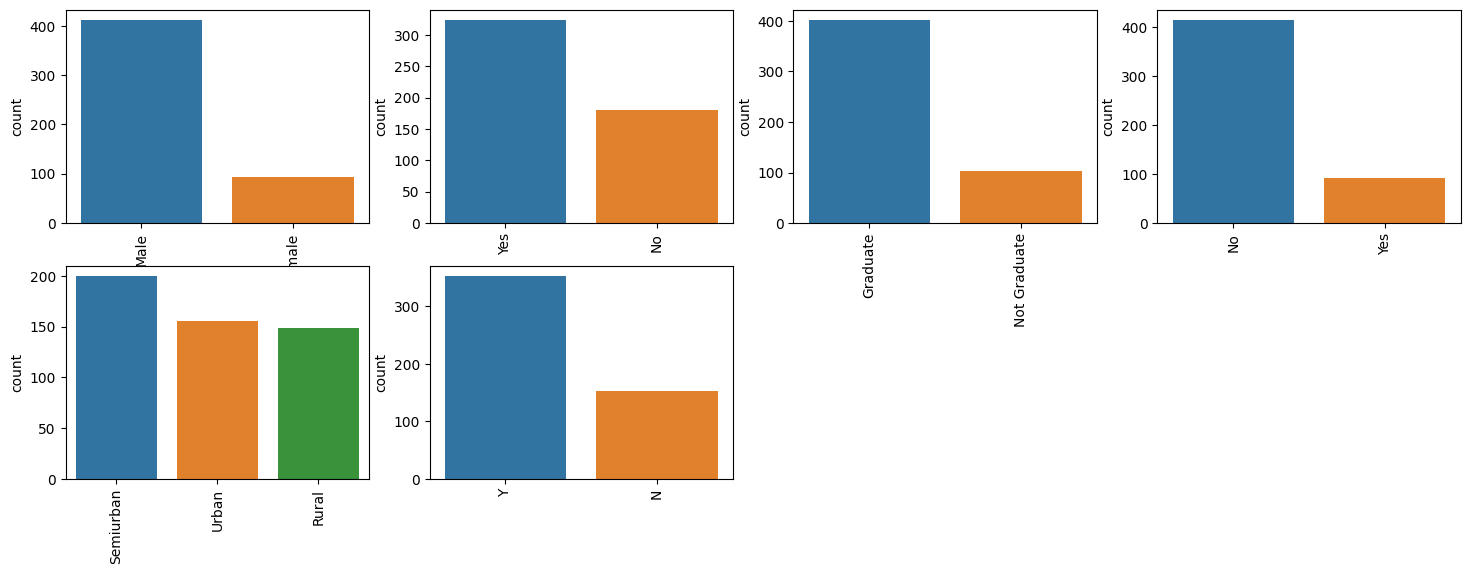

In [5]:
import seaborn as sns
obj = (loan_data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = loan_data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

4. As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [6]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (loan_data.dtypes == 'object')
for col in list(obj[obj].index):
  loan_data[col] = label_encoder.fit_transform(loan_data[col])

Again check the object datatype columns. Let’s find out if there is still any left.

In [7]:
obj = (loan_data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


5. Catplot to visualize the plot for the Gender, and Marital Status of the applicant.

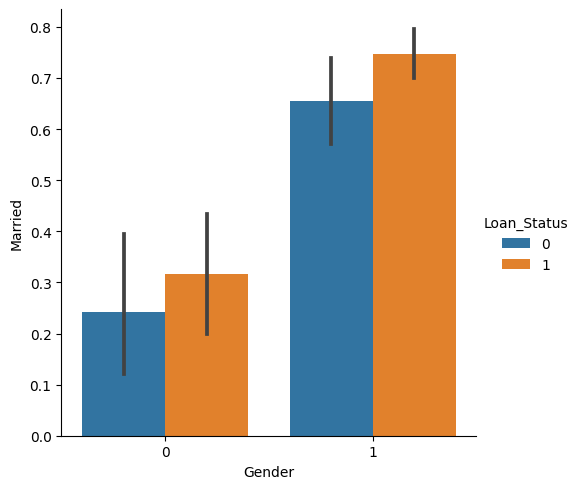

In [8]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=loan_data)

In [9]:
for col in loan_data.columns:
  loan_data[col] = loan_data[col].fillna(loan_data[col].mean()) 
    
loan_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there are no missing values, then we must proceed to model training.

In [10]:
X = loan_data.drop(['Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

In [11]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [12]:
X.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,0,0,4583,1508.0,128,360,1,0
1,1,1,0,0,1,3000,0.0,66,360,1,2
2,1,1,0,1,0,2583,2358.0,120,360,1,2
3,1,0,0,0,0,6000,0.0,141,360,1,2
4,1,1,2,0,1,5417,4196.0,267,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,0,0,0,2900,0.0,71,360,1,0
501,1,1,3,0,0,4106,0.0,40,180,1,0
502,1,1,1,0,0,8072,240.0,253,360,1,2
503,1,1,2,0,0,7583,0.0,187,360,1,2


In [13]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=1000)


In [14]:
X_train.shape

(353, 11)

In [15]:
X_test.shape

(152, 11)

In [16]:
Y_train.shape

(353,)

In [17]:
Y_test.shape

(152,)

Model Training and Evaluation

In [18]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [19]:
classifiers = [
    XGBClassifier(),
    LGBMClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier()
]

In [20]:
# Define the hyperparameter grids for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}


In [21]:

def train_and_evaluate(classifier, X_train, Y_train, X_test, Y_test, param_grid=None):
    if param_grid:
        # Perform grid search for hyperparameter tuning
        grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)
        grid_search.fit(X_train, Y_train)
        
        # Get the best estimator
        classifier = grid_search.best_estimator_
    
    # Fit the classifier on the training data
    classifier.fit(X_train, Y_train)
    
    # Predict the labels for the test data
    Y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    
    return accuracy

# Loop over classifiers
for classifier in classifiers:
    if classifier.__class__.__name__ == 'XGBClassifier':
        accuracy = train_and_evaluate(classifier, X_train, Y_train, X_test, Y_test, param_grid=param_grid_xgb)
   
    else:
        accuracy = train_and_evaluate(classifier, X_train, Y_train, X_test, Y_test)
    
    # Print the accuracy for each classifier
    print(f"Accuracy for {type(classifier).__name__}: {accuracy}")

Accuracy for XGBClassifier: 0.8157894736842105
Accuracy for LGBMClassifier: 0.7960526315789473
Accuracy for RandomForestClassifier: 0.8092105263157895
Accuracy for LogisticRegression: 0.8289473684210527
Accuracy for KNeighborsClassifier: 0.6644736842105263
Accuracy for RandomForestClassifier: 0.8026315789473685
Accuracy for GradientBoostingClassifier: 0.7697368421052632
Accuracy for DecisionTreeClassifier: 0.7105263157894737
Accuracy for AdaBoostClassifier: 0.75


In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train,Y_train)

AdaBoostClassifier()

In [23]:
y_pred2 = ada_model.predict(X_test)
print(accuracy_score(Y_test, y_pred2))

0.75


LogisticRegressionClassifer performed bes tout of all the trained models, hence it will be saved into a joblib file for further use

In [24]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
y_pred3 = log_model.predict(X_test)
print(accuracy_score(Y_test, y_pred3))

0.8289473684210527


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66        50
           1       0.80      0.99      0.89       102

    accuracy                           0.83       152
   macro avg       0.88      0.75      0.77       152
weighted avg       0.85      0.83      0.81       152



save the model.

In [27]:
import joblib

joblib.dump(log_model,"log_model_loan.joblib")

['log_model_loan.joblib']

Feature Importance

In [28]:
# Calculate feature importance
feature_importance = log_model.coef_[0]
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print the feature importance scores
print(importance_df)

              Feature  Importance
9      Credit_History    2.349583
1             Married    0.485320
0              Gender    0.203168
10      Property_Area    0.180634
5     ApplicantIncome   -0.000012
6   CoapplicantIncome   -0.000063
4       Self_Employed   -0.000682
7          LoanAmount   -0.002493
8    Loan_Amount_Term   -0.002916
2          Dependents   -0.065465
3           Education   -0.732109


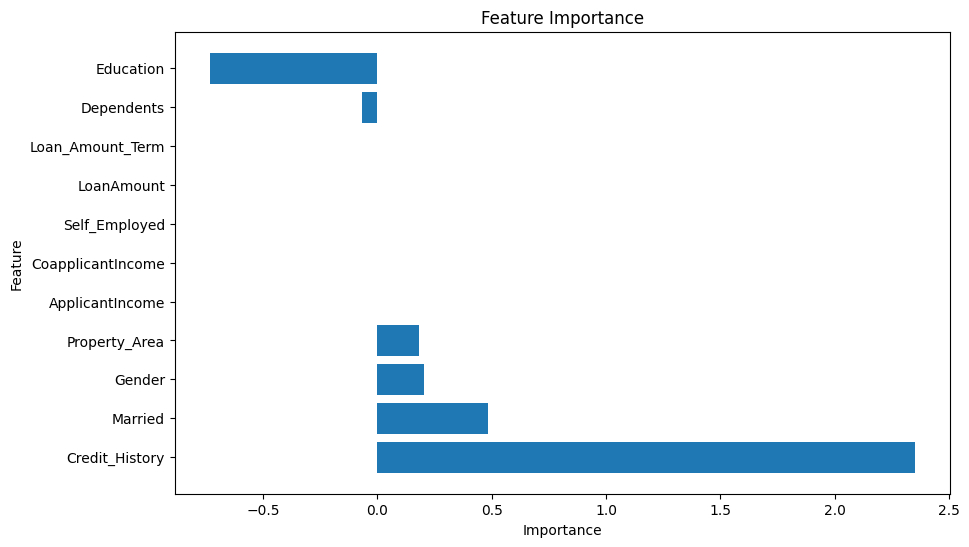

In [29]:
feature_importance = log_model.coef_[0]
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()